## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

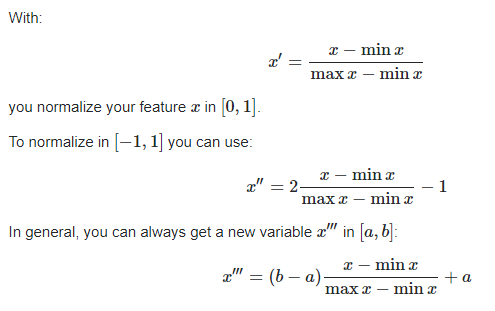

In [1]:
## 確認硬體資源
!nvidia-smi

In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [56]:
## 資料前處理
def preproc_x(x, flatten=True):
    maxs_x = np.max(x)
    mins_x = np.min(x)
    x = 2 * ((x - mins_x) / (maxs_x - mins_x)) -1
    if flatten:
        x = x.reshape((len(x), -1))
    return x    

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [26]:
x_train.reshape((len(x_train), -1)).shape

(50000, 3072)

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [58]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [59]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 8]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [60]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 8)                 520       
_________________________________________________________________
output (Dense)               (None, 10)                90  

In [61]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [62]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [63]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 21s 412us/step - loss: 1.9185 - accuracy: 0.3132 - val_loss: 1.7580 - val_accuracy: 0.3817
Epoch 2/100
50000/50000 [==============================] - 17s 336us/step - loss: 1.6202 - accuracy: 0.4285 - val_loss: 1.5339 - val_accuracy: 0.4660
Epoch 3/100
50000/50000 [==============================] - 16s 323us/step - loss: 1.4660 - accuracy: 0.4824 - val_loss: 1.4669 - val_accuracy: 0.4832
Epoch 4/100
50000/50000 [==============================] - 17s 335us/step - loss: 1.3550 - accuracy: 0.5224 - val_loss: 1.4121 - val_accuracy: 0.5067
Epoch 5/100
50000/50000 [==============================] - 17s 334us/step - loss: 1.2646 - accuracy: 0.5532 - val_loss: 1.3989 - val_accuracy: 0.5124
Epoch 6/100
50000/50000 [==============================] - 17s 341us/step - loss: 1.1833 - accuracy: 0.5791 - val_loss: 1.3923 - val_accuracy: 0.5190
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 16s 329us/step - loss: 0.1180 - accuracy: 0.9599 - val_loss: 4.1991 - val_accuracy: 0.5125
Epoch 56/100
50000/50000 [==============================] - 16s 317us/step - loss: 0.0862 - accuracy: 0.9712 - val_loss: 4.4850 - val_accuracy: 0.5213
Epoch 57/100
50000/50000 [==============================] - 16s 313us/step - loss: 0.0957 - accuracy: 0.9673 - val_loss: 4.4127 - val_accuracy: 0.5266
Epoch 58/100
50000/50000 [==============================] - 16s 312us/step - loss: 0.1013 - accuracy: 0.9655 - val_loss: 4.3845 - val_accuracy: 0.5273
Epoch 59/100
50000/50000 [==============================] - 16s 313us/step - loss: 0.0967 - accuracy: 0.9684 - val_loss: 4.4045 - val_accuracy: 0.5219
Epoch 60/100
50000/50000 [==============================] - 16s 312us/step - loss: 0.1252 - accuracy: 0.9591 - val_loss: 4.2844 - val_accuracy: 0.5153
Epoch 61/100
50000/50000 [==============================] - 16s 312us/step - loss: 0.1017 - ac

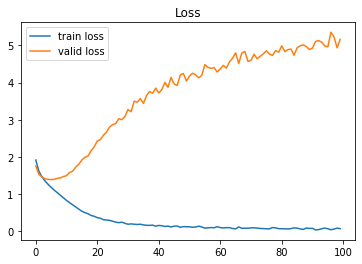

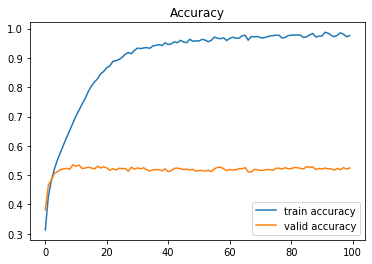

In [65]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()